In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO

In [2]:
# Connect to S3 bucket using boto3
s3 = boto3.client("s3")

# Download the USD exchange rates file
s3.download_file("myfirstdefaultbucket", "usd_exchange_rates.csv", "usd_exchange_rates.csv")

# Download the EUR exchange rates file
s3.download_file("myfirstdefaultbucket", "eur_exchange_rates.csv", "eur_exchange_rates.csv")

In [3]:
# Read the USD exchange rate data from the CSV file
usd_exchange_rate_data = pd.read_csv(f"./usd_exchange_rates.csv", parse_dates=["exchangedate"], dayfirst=True)
usd_exchange_rate_data["exchangedate"] = pd.to_datetime(usd_exchange_rate_data["exchangedate"], format="%d.%m.%Y")
print(usd_exchange_rate_data)

    exchangedate  r030   cc        txt     enname     rate  units   
0     2021-12-31   840  USD  Долар США  US Dollar  27.2782      1  \
1     2021-12-30   840  USD  Долар США  US Dollar  27.2077      1   
2     2021-12-29   840  USD  Долар США  US Dollar  27.2235      1   
3     2021-12-28   840  USD  Долар США  US Dollar  27.2306      1   
4     2021-12-27   840  USD  Долар США  US Dollar  27.2747      1   
..           ...   ...  ...        ...        ...      ...    ...   
360   2021-01-05   840  USD  Долар США  US Dollar  28.4310      1   
361   2021-01-04   840  USD  Долар США  US Dollar  28.2746      1   
362   2021-01-03   840  USD  Долар США  US Dollar  28.2746      1   
363   2021-01-02   840  USD  Долар США  US Dollar  28.2746      1   
364   2021-01-01   840  USD  Долар США  US Dollar  28.2746      1   

     rate_per_unit  group    calcdate  
0          27.2782      1  30.12.2021  
1          27.2077      1  29.12.2021  
2          27.2235      1  28.12.2021  
3          

In [4]:
# Read the EUR exchange rate data from the CSV file
eur_exchange_rate_data = pd.read_csv(f"./eur_exchange_rates.csv", parse_dates=["exchangedate"], dayfirst=True)
eur_exchange_rate_data["exchangedate"] = pd.to_datetime(eur_exchange_rate_data["exchangedate"], format="%d.%m.%Y")
print(eur_exchange_rate_data)

    exchangedate  r030   cc   txt enname     rate  units  rate_per_unit   
0     2021-12-31   978  EUR  Євро   Euro  30.9226      1        30.9226  \
1     2021-12-30   978  EUR  Євро   Euro  30.7760      1        30.7760   
2     2021-12-29   978  EUR  Євро   Euro  30.8401      1        30.8401   
3     2021-12-28   978  EUR  Євро   Euro  30.8196      1        30.8196   
4     2021-12-27   978  EUR  Євро   Euro  30.8450      1        30.8450   
..           ...   ...  ...   ...    ...      ...    ...            ...   
360   2021-01-05   978  EUR  Євро   Euro  34.9389      1        34.9389   
361   2021-01-04   978  EUR  Євро   Euro  34.7396      1        34.7396   
362   2021-01-03   978  EUR  Євро   Euro  34.7396      1        34.7396   
363   2021-01-02   978  EUR  Євро   Euro  34.7396      1        34.7396   
364   2021-01-01   978  EUR  Євро   Euro  34.7396      1        34.7396   

     group    calcdate  
0        1  30.12.2021  
1        1  29.12.2021  
2        1  28.12.2021  

Text(0.5, 1.0, 'USD and EUR Exchange Rates vs UAH (2021)')

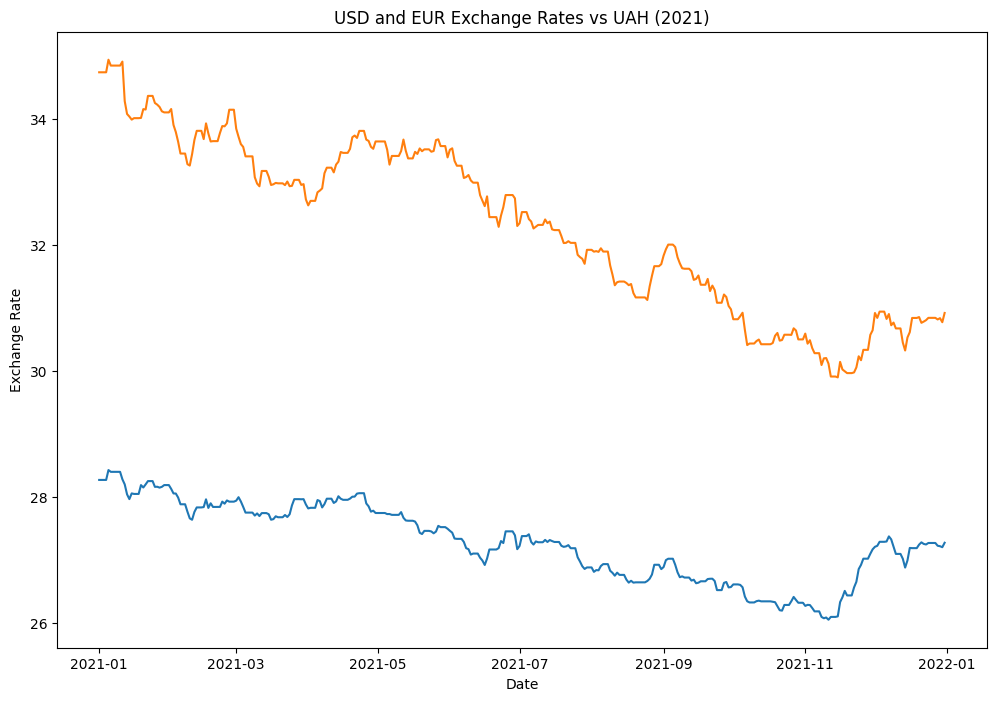

In [5]:
# Plot the exchange rate data
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(usd_exchange_rate_data["exchangedate"], usd_exchange_rate_data["rate"], label="USD")
plt.plot(eur_exchange_rate_data["exchangedate"], eur_exchange_rate_data["rate"], label="EUR")

ax.set_xlabel("Date")
ax.set_ylabel("Exchange Rate")
ax.set_title("USD and EUR Exchange Rates vs UAH (2021)")

In [6]:
# Save the plot image to a BytesIO buffer
img_buffer = BytesIO()
fig.savefig(img_buffer, format="png")
img_buffer.seek(0)

0

In [7]:
# Upload the plot image to S3 bucket
s3.put_object(Bucket="myfirstdefaultbucket", Key="exchange_rate_plot.png", Body=img_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'NABN24F72CR5T1F2',
  'HostId': 'MBwktCzg7/KlS/uHBiSlXA5W93RAJWHpghuTtMSiLRQLPhviyJDLoKh7T5xz+Lvupag+PbpQIPc=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'MBwktCzg7/KlS/uHBiSlXA5W93RAJWHpghuTtMSiLRQLPhviyJDLoKh7T5xz+Lvupag+PbpQIPc=',
   'x-amz-request-id': 'NABN24F72CR5T1F2',
   'date': 'Sun, 09 Apr 2023 17:03:49 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"ae9564506b9031bf123f93ebe04f8676"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"ae9564506b9031bf123f93ebe04f8676"',
 'ServerSideEncryption': 'AES256'}